The test phase in the training loop should load the whole recordings.

In [1]:
import torch

In [2]:
data = torch.tensor(list(range(1,86)))

In [3]:
data

tensor([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
        19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
        37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54,
        55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72,
        73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85])

In [4]:
print(data[0:10])
print(' '*31, data[8:18])
print(' '*63, data[16:26])

tensor([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])
                                tensor([ 9, 10, 11, 12, 13, 14, 15, 16, 17, 18])
                                                                tensor([17, 18, 19, 20, 21, 22, 23, 24, 25, 26])


In [5]:
batch = []
step = 8
for i in range(0, len(data), step):
    batch.append(data[i:i+10])
if len(batch[-1]) < 10:
    batch[-1] = torch.concat([batch[-1], torch.zeros(10-len(batch[-1]), dtype=int)])
batch = torch.stack(batch)
print(batch)

tensor([[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
        [ 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
        [17, 18, 19, 20, 21, 22, 23, 24, 25, 26],
        [25, 26, 27, 28, 29, 30, 31, 32, 33, 34],
        [33, 34, 35, 36, 37, 38, 39, 40, 41, 42],
        [41, 42, 43, 44, 45, 46, 47, 48, 49, 50],
        [49, 50, 51, 52, 53, 54, 55, 56, 57, 58],
        [57, 58, 59, 60, 61, 62, 63, 64, 65, 66],
        [65, 66, 67, 68, 69, 70, 71, 72, 73, 74],
        [73, 74, 75, 76, 77, 78, 79, 80, 81, 82],
        [81, 82, 83, 84, 85,  0,  0,  0,  0,  0]])


In [6]:
preds = []
for i in range(batch.shape[0]):
    preds.append(batch[i][1:9])
preds = torch.concat(preds)
print(preds)

tensor([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
        20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37,
        38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55,
        56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73,
        74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,  0,  0,  0,  0])


In [7]:
from tqdm import tqdm
from wearsed.dataset.WearSEDDataset import WearSEDDataset
ds = WearSEDDataset(mesaid_path='../wearsed/dataset/data_ids/', scoring_from='somnolyzer', signals_to_read=['Pleth'], return_recording=True)

In [8]:
rec_lens = []
for i in tqdm(range(len(ds))):
    d = ds[i]
    rec_lens.append(len(d.hypnogram))

100%|██████████| 1887/1887 [33:46<00:00,  1.07s/it]


In [10]:
import pandas as pd
rec_lens = pd.Series(sorted(rec_lens))

<Axes: >

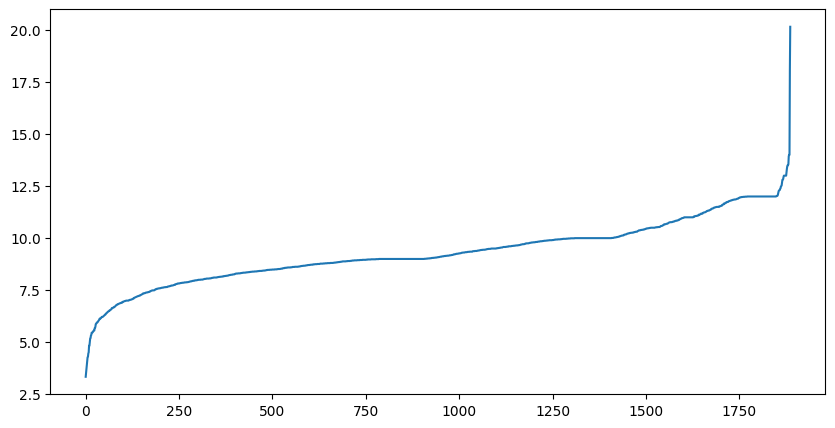

In [14]:
(rec_lens/60/60).plot(figsize=(10, 5))